In [16]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

In [230]:
img = io.imread("C:\\Users\\User\\Desktop\\another.jpg")

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


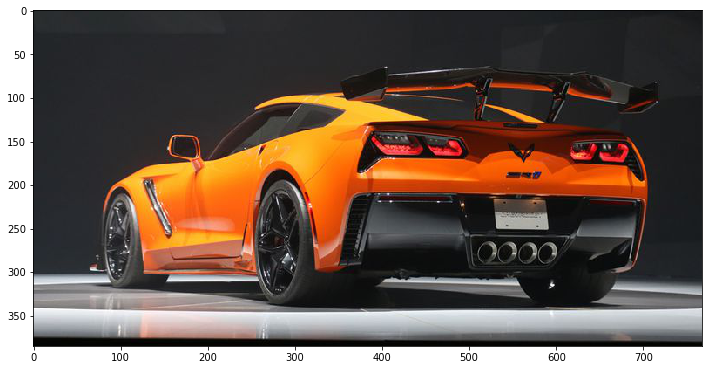

In [231]:
plt.figure(figsize=(10 ,10))
io.imshow(img)

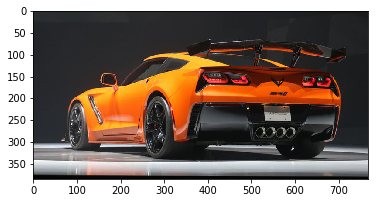

In [232]:
plt.imshow(img)

In [233]:
img.shape

(385, 768, 3)

In [234]:
# Re-shaping the image
img = img.reshape((img.shape[0] * img.shape[1], 3))

In [235]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 4)
clt.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [236]:
# grab the number of different clusters and create a histogram based on the number of pixels assigned to each cluster

numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
hist, b= np.histogram(clt.labels_, bins=numLabels)

In [237]:
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()

In [238]:
# initialize the bar chart representing the relative frequency of each of the colors
bar = np.zeros((50, 300, 3), dtype = "uint8")
startX = 0

In [239]:
import cv2
# loop over the percentage of each cluster and the color of each cluster

for (percent, color) in zip(hist, clt.cluster_centers_):
    
# plot the relative percentage of each cluster cv2 is ued to draw. Here we have pre-defined our shape as bar. Now we
# are plotting over it by giving start and ending points.
    endX = startX + (percent * 300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
    startX = endX

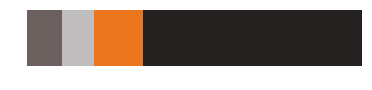

In [240]:
plt.axis("off")
plt.imshow(bar)

In [241]:
a=clt.cluster_centers_


In [242]:
a=np.round(a, 0)
a=a.astype('int')
a

array([[108,  97,  95],
       [192, 190, 191],
       [235, 118,  30],
       [ 37,  33,  34]])

In [243]:
for i in range(4):
    s="rgb("
    for j in range(3):
        s=s+str(a[i][j])+','
    s=s+')'
    print(s)

rgb(108,97,95,)
rgb(192,190,191,)
rgb(235,118,30,)
rgb(37,33,34,)


In [244]:
hexa=[]
temp=""
for i in range(4):
    temp=''
    for j in range(3):
        temp=temp+hex(a[i][j])
    hexa.append(temp)

In [245]:
hexa

['0x6c0x610x5f', '0xc00xbe0xbf', '0xeb0x760x1e', '0x250x210x22']

In [246]:
import re
hexa_new=['#'+re.sub('0x','', i) for i in hexa]
hexa_new

['#6c615f', '#c0bebf', '#eb761e', '#252122']

In [247]:
for i in hexa_new:
    print('hex(rrggbb)= '+i)

hex(rrggbb)= #6c615f
hex(rrggbb)= #c0bebf
hex(rrggbb)= #eb761e
hex(rrggbb)= #252122


NameError: name 'n_clusters' is not defined